<a href="https://colab.research.google.com/github/qmaruf/pyspark/blob/main/pyspark_count_word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pyspark

     |████████████████████████████████| 204.2MB 66kB/s 
     |████████████████████████████████| 204kB 47.7MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612242 sha256=49e3366894f3815216df9aa2a2ef55f19d530cda04203257b5d04c24e9e2d2ad
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


We will count the word of a Harry Potter book using pyspark

In [3]:
! wget "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt"

--2021-01-17 02:31:06--  https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492161 (481K) [text/plain]
Saving to: ‘Book 1 - The Philosopher's Stone.txt’

Book 1 - The Philos 100%[===================>] 480.63K  --.-KB/s    in 0.02s   

2021-01-17 02:31:06 (26.9 MB/s) - ‘Book 1 - The Philosopher's Stone.txt’ saved [492161/492161]



In [14]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import functions

In [5]:
conf = SparkConf().setMaster('local').setAppName('wordCount')
sc = SparkContext(conf=conf)

In [7]:
book = sc.textFile("Book 1 - The Philosopher's Stone.txt")

In [10]:
book.take(10)

['/ ',
 '',
 '',
 '',
 '',
 'THE BOY WHO LIVED ',
 '',
 'Mr. and Mrs. Dursley, of number four, Privet Drive, ',
 'were proud to say that they were perfectly normal, ',
 'thank you very much. They were the last people you’d ']

In [17]:
words = book.flatMap(lambda x: x.split())

In [18]:
words.take(10)

['/', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley,', 'of']

In [31]:
# wordsLower = words.filter(lambda x: x is not None).map(lambda x: functions.lower(x))

In [45]:
wordCount = words.map(lambda x: 1)

AttributeError: ignored

In [40]:
import seaborn as sns
%matplotlib inline

In [72]:
output = book \
.flatMap(lambda x: x.strip().split()) \
.map(lambda word: (word, 1)) \
.reduceByKey(lambda a,b : a+b, 1) \
.map(lambda x: (x[1], x[0])) \
.sortByKey(0, 1) \
.map(lambda x: (x[1], x[0]))

In [78]:
words = list(output.keys().collect())
freqs = list(output.values().collect())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


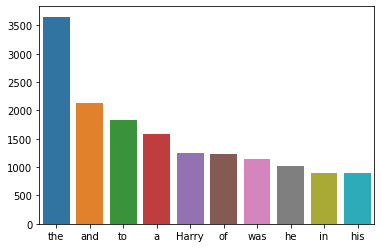

In [89]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(50, 5))
sns.barplot(words[:10], freqs[:10])